In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [65]:
load_data = pd.read_csv("Mall_Customers.csv")
load_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
load_data.shape


(200, 5)

In [67]:
load_data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
load_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [69]:
load_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Select relevent featuers

In [71]:
X= load_data[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

In [53]:

# Data preprocessing
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [72]:
from sklearn.preprocessing import RobustScaler  # Less sensitive to outliers
scaler = RobustScaler()

In [73]:
from sklearn.mixture import GaussianMixture  # For density-based clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=5, random_state=42)

In [75]:
# Determine Optimal K using Elbow Method and Silhouette Score
wcss = []
silhouette_score = []
k_range = range(2, 10)
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

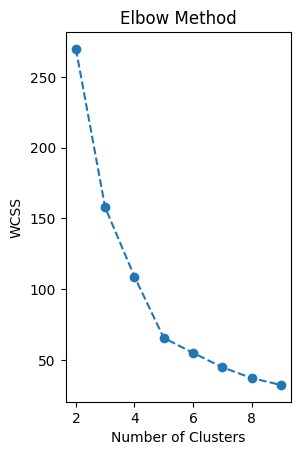

In [76]:
# Elbow Method
from sklearn.cluster import KMeans
plt.subplot(1, 2, 1)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(list(k_range), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

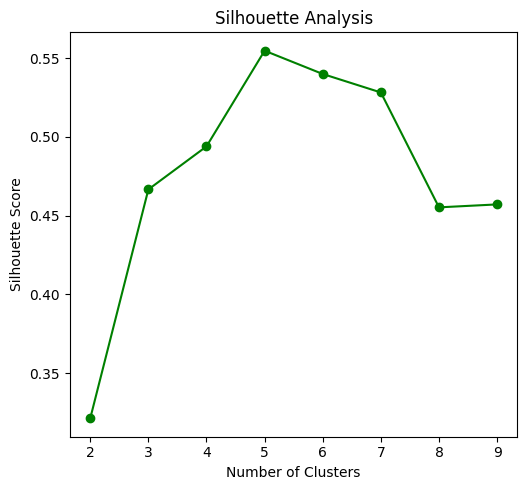

In [77]:
# Silhouette Score
from sklearn.metrics import silhouette_score
k_range = range(2, 10)
silhouette_scores = []  
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

In [78]:
Kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = Kmeans.fit_predict(X_scaled)
load_data['Cluster'] = clusters

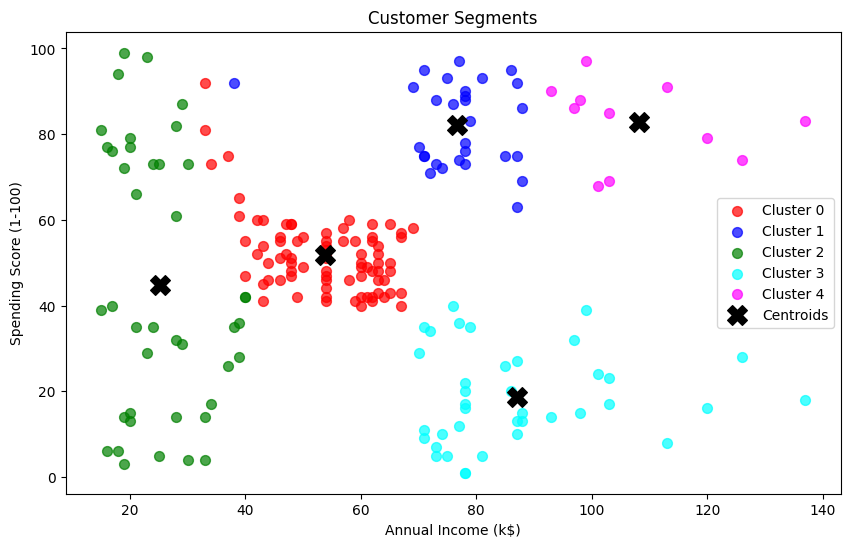

In [79]:
#Visualization Cluster
scaler = RobustScaler()
X_scaled = scaler.fit_transform(load_data[['Annual Income (k$)', 'Spending Score (1-100)']])  # Fit it here

kmeans = KMeans(n_clusters=5, random_state=42)
load_data['cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters

plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(load_data[load_data['cluster'] == i]['Annual Income (k$)'],
                load_data[load_data['cluster'] == i]['Spending Score (1-100)'],
                s=50, c=colors[i],label=f'Cluster {i}', alpha=0.7
                )

centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [80]:
# Cluster Analysis
cluster_profile = load_data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    'Age': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\nCluster Profiles:")
print(cluster_profile)

# Business Interpretation
segment_descriptions = {
    0: "High Income, Low Spending - Potential targets for premium products",
    1: "Moderate Income, High Spending - Best customers for promotions",
    2: "Low Income, Low Spending - Budget-conscious shoppers",
    3: "Low Income, High Spending - Value-seekers needing attention",
    4: "High Income, High Spending - VIP customers for loyalty programs"
}

print("\nSegment Interpretations:")
for cluster, desc in segment_descriptions.items():
    print(f"Cluster {cluster}: {desc}")


Cluster Profiles:
        Annual Income (k$)        Spending Score (1-100)               Age  \
                      mean median                   mean median       mean   
Cluster                                                                      
0                55.296296   54.0              49.518519   50.0  42.716049   
1                86.538462   79.0              82.128205   83.0  32.692308   
2                25.727273   24.5              79.363636   77.0  25.272727   
3                88.200000   85.0              17.114286   16.0  41.114286   
4                26.304348   25.0              20.913043   17.0  45.217391   

        Count  
        count  
Cluster        
0          81  
1          39  
2          22  
3          35  
4          23  

Segment Interpretations:
Cluster 0: High Income, Low Spending - Potential targets for premium products
Cluster 1: Moderate Income, High Spending - Best customers for promotions
Cluster 2: Low Income, Low Spending - Budget-consc

In [83]:

def predict_customer_segment():
    # Get user input
    print("\nEnter customer details to predict their segment:")
    age = int(input("Age: "))
    annual_income = float(input("Annual Income (k$): "))
    spending_score = float(input("Spending Score (1-100): "))
    
    # Create feature array
    new_customer = np.array([[annual_income, spending_score]])
    
    # Scale features using the same scaler
    new_customer_scaled = scaler.transform(new_customer)
    
    # Predict cluster
    predicted_cluster = kmeans.predict(new_customer_scaled)[0]
    segment = segment_descriptions[predicted_cluster]
    
    # Display results
    print(f"\nPredicted Segment: {segment}")
    print(f"Assigned Cluster: {predicted_cluster}")

# Interactive prediction loop
while True:
    predict_customer_segment()
    repeat = input("\nPredict another customer? (y/n): ").lower()
    if repeat != 'y':
        break


Enter customer details to predict their segment:


c:\Users\ajmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(



Predicted Segment: Moderate Income, High Spending - Best customers for promotions
Assigned Cluster: 1
